# STL 10: IMAGE CLASSIFICATION

## Data Exploration and Visualization

## About STL10

STL 10 is a variation of the CIFAR 10 data set. The images in STL 10 are acquired from the labelled images in ImageNet. The dataset is made up of 10 classes: airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck. Images are 96 by 96 pixels in size. There are 500 training images per class and 800 testing images per class :13,000 images in total. It also contains 100,000 unlabeled images for unsupervised learning.


## Objective

The objective of this paper is to develop a model that can classify any class of objects in the data set.

### Loading STL 10 Image Dataset

In order to load the data, Martin Tutek's python code was used available at https://github.com/mttk/STL10.

sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)


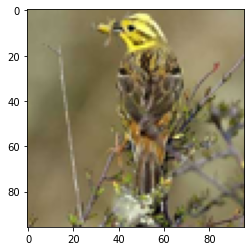

(5000, 96, 96, 3)
(5000,)
Saving images to disk
./img/2/0
./img/6/1
./img/2/2
./img/7/3
./img/4/4
./img/10/5
./img/8/6
./img/5/7
./img/6/8
./img/9/9
./img/1/10
./img/7/11
./img/1/12
./img/9/13
./img/8/14
./img/7/15
./img/5/16
./img/7/17
./img/3/18
./img/3/19
./img/2/20
./img/2/21
./img/7/22
./img/3/23
./img/2/24
./img/9/25
./img/6/26
./img/2/27
./img/6/28
./img/6/29
./img/1/30
./img/1/31
./img/1/32
./img/2/33
./img/4/34
./img/7/35
./img/8/36
./img/3/37
./img/2/38
./img/4/39
./img/2/40
./img/7/41
./img/2/42
./img/4/43
./img/8/44
./img/5/45
./img/4/46
./img/1/47
./img/7/48
./img/8/49
./img/7/50
./img/6/51
./img/9/52
./img/1/53
./img/7/54
./img/2/55
./img/4/56
./img/7/57
./img/9/58
./img/3/59
./img/3/60
./img/10/61
./img/10/62
./img/6/63
./img/2/64
./img/8/65
./img/9/66
./img/8/67
./img/9/68
./img/9/69
./img/10/70
./img/1/71
./img/6/72
./img/1/73
./img/3/74
./img/6/75
./img/6/76
./img/8/77
./img/9/78
./img/10/79
./img/6/80
./img/1/81
./img/9/82
./img/4/83
./img/3/84
./img/10/85
./img/7/86

In [1]:
from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)
        

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1
    
if __name__ == "__main__":
    # download data if needed
    download_and_extract()

    # test to check if the image is read correctly
    with open(DATA_PATH) as f:
        image = read_single_image(f)
        plot_image(image)

    # test to check if the whole dataset is read correctly
    images = read_all_images(DATA_PATH)
    print(images.shape)

    labels = read_labels(LABEL_PATH)
    print(labels.shape)

    # save images to disk
    save_images(images, labels)

After loading the stl 10 dataset, the following code was used to switch the names of the training and testing files.  For the purpose of this project, a slight modification to the stl_10 dataset is required in order to make the training set more than the test set. In the code below, the initial training set has been converted to test set and the initial test set has been converted to training set.

In order to load and visualize the first image in the dataset, after switching the names of the binary files, the code below was used.

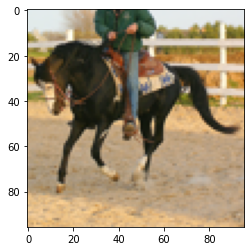

(8000, 96, 96, 3)
(8000,)
Saving images to disk
./img/7/0
./img/8/1
./img/6/2
./img/1/3
./img/4/4
./img/2/5
./img/2/6
./img/2/7
./img/5/8
./img/5/9
./img/1/10
./img/1/11
./img/5/12
./img/1/13
./img/2/14
./img/6/15
./img/5/16
./img/10/17
./img/1/18
./img/7/19
./img/6/20
./img/4/21
./img/2/22
./img/4/23
./img/3/24
./img/7/25
./img/6/26
./img/6/27
./img/3/28
./img/8/29
./img/2/30
./img/7/31
./img/4/32
./img/8/33
./img/10/34
./img/3/35
./img/5/36
./img/8/37
./img/10/38
./img/6/39
./img/2/40
./img/10/41
./img/1/42
./img/7/43
./img/5/44
./img/10/45
./img/2/46
./img/2/47
./img/4/48
./img/3/49
./img/6/50
./img/5/51
./img/1/52
./img/1/53
./img/10/54
./img/9/55
./img/7/56
./img/8/57
./img/3/58
./img/1/59
./img/1/60
./img/2/61
./img/2/62
./img/8/63
./img/10/64
./img/7/65
./img/2/66
./img/9/67
./img/1/68
./img/5/69
./img/3/70
./img/2/71
./img/8/72
./img/2/73
./img/3/74
./img/8/75
./img/6/76
./img/4/77
./img/6/78
./img/8/79
./img/4/80
./img/1/81
./img/10/82
./img/4/83
./img/1/84
./img/2/85
./img/9/

In [2]:
DATA_PATH ='./data/stl10_binary/test_x.bin' 
LABEL_PATH ='./data/stl10_binary/test_y.bin'

if __name__ == "__main__":

    # test to check if the image is read correctly
    with open(DATA_PATH) as f:
        image_train = read_single_image(f)
        plot_image(image_train)

    # test to check if the whole dataset is read correctly
    images_train = read_all_images(DATA_PATH)
    print(images_train.shape)

    labels_train = read_labels(LABEL_PATH)
    print(labels_train.shape)

    
    # save images to disk
    save_images(images_train, labels_train)

### Visualising the Image Data Set

Viewing first 20 images in the train folder of the dataset after switching the train and test files.

Training Images


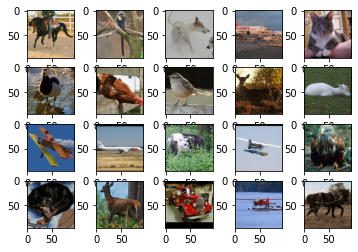

Testing Images


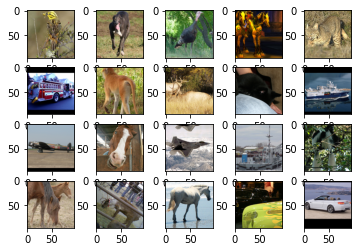

In [3]:
test_x = images
test_y = labels
train_x = images_train
train_y = labels_train
column = 5
row = 4

print("Training Images")
for i in range(20):
    plt.subplot(row,column,i+1)
    plt.imshow(train_x[i])
plt.show()

print("Testing Images")
for i in range(20):
    plt.subplot(row,column,i+1)
    plt.imshow(test_x[i])
plt.show()

The images are then loaded into a numpy array called X_train and Y_test. After that, the images are converted to grayscale in order to make their color channel just one and easier for processing.

## Preprocessing the Images

Training Images


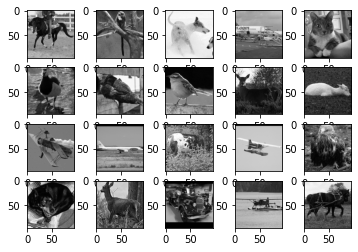

Testing Images


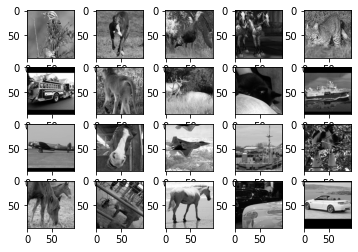

In [16]:
import cv2

x_train= np.zeros(train_x.shape[:-1])
for i in range(train_x.shape[0]): 
    x_train[i] = cv2.cvtColor(train_x[i], cv2.COLOR_BGR2GRAY)

print("Training Images")
for i in range(20):
    plt.subplot(row,column,i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

x_test = np.zeros(test_x.shape[:-1])
for i in range(test_x.shape[0]): 
    x_test[i] = cv2.cvtColor(test_x[i], cv2.COLOR_BGR2GRAY)
    
print("Testing Images")
for i in range(20):
    plt.subplot(row,column,i+1)
    plt.imshow(x_test[i], cmap='gray')
plt.show()

In [5]:
with open('data/stl10_binary/class_names.txt', 'r') as f:  # Read class_names.txt
    class_names = f.read().splitlines()  # This line puts the names of the classes in an array   
    print(class_names)

['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


### Normalizing the Pixel Values

### Statistical Summary of Images

The statistical summary of the images in RGB is given below

In [6]:
print('Train', train_x.shape, train_y.shape)
print('Test', test_x.shape, test_y.shape)
# summarize pixel valuesimages_train
print('Train', train_x.min(), train_x.max(), train_x.mean(), train_x.std())
print('Test', test_x.min(), test_x.max(), test_x.mean(), test_x.std())

Train (8000, 96, 96, 3) (8000,)
Test (5000, 96, 96, 3) (5000,)
Train 0 255 109.80558034035012 67.09145233502375
Test 0 255 109.91918714554399 67.1628301292746


The statistical summary for the grayscale version

In [7]:
print('Train', x_train.shape, train_y.shape)
print('Test', x_test.shape, test_y.shape)
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

Train (8000, 96, 96) (8000,)
Test (5000, 96, 96) (5000,)
Train 0.0 255.0 109.68377187771267 64.70798484362349
Test 0.0 255.0 109.82260407986111 64.81157811845712


### Scale Images
Scale the pixel values in on a scale of 0-1

In [9]:
X_train = x_train/255
X_test = x_test/255
print('Train', X_train.min(), X_train.max())
print('Shape', X_train.shape)

Train 0.0 1.0
Shape (8000, 96, 96)


### Reshape Images 
Reshape images to show the total number of features and prepare the train images for classification

In [9]:
train_images=X_train.reshape(8000, 96*96)
test_images=X_test.reshape(5000, 96*96)
print(train_images, train_images.shape)
print(test_images, test_images.shape)

[[0.92156863 0.92156863 0.92156863 ... 0.56078431 0.54117647 0.51372549]
 [0.28627451 0.32156863 0.34901961 ... 0.61568627 0.62745098 0.56078431]
 [0.71764706 0.71372549 0.71372549 ... 0.6627451  0.65490196 0.65490196]
 ...
 [0.72941176 0.73333333 0.73333333 ... 0.49411765 0.48627451 0.51764706]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12156863 0.12156863 0.12156863 ... 0.56078431 0.54509804 0.64313725]] (8000, 9216)
[[0.52156863 0.52156863 0.52156863 ... 0.49411765 0.52156863 0.46666667]
 [0.46666667 0.44313725 0.49019608 ... 0.47058824 0.4745098  0.60784314]
 [0.7254902  0.6627451  0.63529412 ... 0.54901961 0.50980392 0.4745098 ]
 ...
 [0.54117647 0.54117647 0.54117647 ... 0.4745098  0.4627451  0.45490196]
 [0.51764706 0.5254902  0.51764706 ... 0.49803922 0.6        0.71764706]
 [0.81176471 0.81568627 0.81960784 ... 0.70588235 0.75294118 0.76862745]] (5000, 9216)


Show that labels are integers

## Classification

### Using Multinomial Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
mnb = MultinomialNB()
mnb.fit(train_images, train_y)

MultinomialNB()

In [18]:
m_y_pred = mnb.predict(test_images)

In [19]:
print("Accuracy:", metrics.accuracy_score(test_y, m_y_pred))

Accuracy: 0.2566


### Using Gaussian Naive Bayes Classifiers

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_images, train_y)


GaussianNB()

In [21]:
y_pred = gnb.predict(test_images)

In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.3078


### Random Classifier

In [23]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
dmy_clf.fit(train_images, train_y)

DummyClassifier()

In [24]:
y_probas_dmy = dmy_clf.predict(test_images)

In [25]:
print("Accuracy:", metrics.accuracy_score(test_y, y_probas_dmy))

Accuracy: 0.1


The Gaussian Naive Bayes has about 30 percent and the Multinomial Naive Bayes has accuracy of 25.7 percent while a random classifier has about 10 percent accuracy. Both Gaussian and Multinomial Naive Bayes Classifiers perform quite poorly on the data set

### Kappa

## Evaluation Metrics

### Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, y_pred)

array([[264,   5,  18,  24,  86,  15,   9,   8,  62,   9],
       [133,  34,  61,  39, 134,  13,  29,  36,   7,  14],
       [ 24,   5, 261,  22,   8,  12,  21,  10,  47,  90],
       [ 66,  17,  59,  72, 145,  22,  35,  44,  26,  14],
       [ 85,   9,  30,  57, 229,  13,  21,  35,  13,   8],
       [ 94,  24,  48,  49, 121,  40,  58,  31,  17,  18],
       [ 67,  12,  46,  23, 100,  51, 142,  23,  15,  21],
       [ 50,  30,  57,  49, 130,  29,  34,  91,  12,  18],
       [ 71,   6,  53,  20,  22,   3,   4,  12, 266,  43],
       [ 41,   7, 129,  12,  20,  17,  24,  18,  92, 140]], dtype=int64)

Confusion matrix assuming the classifier was perfect

In [94]:
y_train_perfect_predictions = test_y  # pretend we reached perfection
confusion_matrix(test_y, y_train_perfect_predictions)

array([[500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 500,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 500,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 500,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 500,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 500,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 500,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 500,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 500]], dtype=int64)

From comparing both confusion matrices, only classes 1, 3 and 9 have above 50% precision. The rest all have below 50% precision

Confusion matrix for Random Classifier

In [165]:
# pretend we reached perfection
confusion_matrix(test_y, y_probas_dmy)

array([[500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

### Precision and Recall

Precision

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(test_y, y_pred, average='macro')

0.3001066275057857

Recall

In [27]:
recall_score(test_y, y_pred, average='micro')

0.3078

F1 Score

In [28]:
from sklearn.metrics import f1_score
f1_score(test_y, y_pred, average = 'macro')

0.28536229813124125

### Conclusion

Naive Bayes is not a very good classifier for this task

## Selecting K Best Features From Classes

Selecting The Best Two Features Per Class

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=pd.DataFrame(train_images)
x=pd.DataFrame(test_images)
#apply SelectKBest class to extract top 2 best features
bestfeatures2 = SelectKBest(score_func=chi2, k=20).fit(X,train_y)
dfscores = pd.DataFrame(bestfeatures2.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores2 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores2.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores2.nlargest(10,'Score'))  #print 10 best features

      Specs       Score
9122   9122  346.028062
9123   9123  344.975553
9121   9121  343.666246
9214   9214  341.153365
9139   9139  340.264556
9160   9160  340.188378
9120   9120  339.776143
9169   9169  339.616227
9213   9213  339.530146
9138   9138  339.481696


In [30]:
X_train_best_2 = bestfeatures2.transform(X)
X_test_best_2 = bestfeatures2.transform(x)
print(X_train_best_2, X_train_best_2.shape)


[[0.67058824 0.67843137 0.68235294 ... 0.69411765 0.56078431 0.54117647]
 [0.55686275 0.61960784 0.41568627 ... 0.50196078 0.61568627 0.62745098]
 [0.71372549 0.71372549 0.71372549 ... 0.71372549 0.6627451  0.65490196]
 ...
 [0.49411765 0.49803922 0.49803922 ... 0.38039216 0.49411765 0.48627451]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.50588235 0.52941176 0.5372549  ... 0.56862745 0.56078431 0.54509804]] (8000, 20)


### Using Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_best_2, train_y)
y_pred_2 = gnb.predict(X_test_best_2)

In [32]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_2))

Accuracy: 0.175


Precision and Recall

In [33]:
precision_score(test_y, y_pred_2, average='macro')

0.16393420388927157

Recall

In [34]:
recall_score(test_y, y_pred_2, average='micro')

0.175

F1 Score

In [35]:
f1_score(test_y, y_pred_2, average='micro')


0.175

Selecting the best 5 features per class

In [36]:
#apply SelectKBest class to extract top 5 best features
bestfeatures5 = SelectKBest(score_func=chi2, k=50).fit(X,train_y)
dfscores5 = pd.DataFrame(bestfeatures5.scores_)
dfcolumns5 = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores5 = pd.concat([dfcolumns5,dfscores5],axis=1)
featureScores5.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores5.nlargest(10,'Score'))  #print 10 best features

      Specs       Score
9122   9122  346.028062
9123   9123  344.975553
9121   9121  343.666246
9214   9214  341.153365
9139   9139  340.264556
9160   9160  340.188378
9120   9120  339.776143
9169   9169  339.616227
9213   9213  339.530146
9138   9138  339.481696


In [37]:
X_train_best_5 = bestfeatures5.transform(X)
X_test_best_5 = bestfeatures5.transform(x)
print(X_train_best_5, X_train_best_5.shape)

[[0.63921569 0.6745098  0.69411765 ... 0.63137255 0.56078431 0.54117647]
 [0.44705882 0.50196078 0.51372549 ... 0.62352941 0.61568627 0.62745098]
 [0.70588235 0.70980392 0.71372549 ... 0.64705882 0.6627451  0.65490196]
 ...
 [0.49411765 0.30196078 0.15294118 ... 0.48235294 0.49411765 0.48627451]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.50588235 0.5254902  0.54117647 ... 0.55686275 0.56078431 0.54509804]] (8000, 50)


### Using Naive Bayes Classifier

In [38]:
gnb = GaussianNB()
gnb.fit(X_train_best_5, train_y)
y_pred_5 = gnb.predict(X_test_best_5)

In [39]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_5))

Accuracy: 0.1786


Precision and Recall

In [40]:
precision_score(test_y, y_pred_5, average='macro')

0.17092581068626062

Recall

In [41]:
recall_score(test_y, y_pred_5, average='micro')

0.1786

F1 Score

In [42]:
f1_score(test_y, y_pred_5, average='micro')

0.1786

Selecting The Best Ten Features

In [43]:
#apply SelectKBest class to extract top 10 best features
bestfeatures10 = SelectKBest(score_func=chi2, k=100).fit(X,train_y)
dfscores = pd.DataFrame(bestfeatures10.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

      Specs       Score
9122   9122  346.028062
9123   9123  344.975553
9121   9121  343.666246
9214   9214  341.153365
9139   9139  340.264556
9160   9160  340.188378
9120   9120  339.776143
9169   9169  339.616227
9213   9213  339.530146
9138   9138  339.481696
9162   9162  339.106586


In [44]:
X_train_best_10 = bestfeatures10.transform(X)
X_test_best_10 = bestfeatures10.transform(x)
print(X_train_best_10, X_train_best_10.shape)

[[0.70196078 0.63921569 0.59215686 ... 0.56078431 0.54117647 0.51372549]
 [0.70588235 0.44705882 0.43921569 ... 0.61568627 0.62745098 0.56078431]
 [0.70980392 0.70588235 0.70980392 ... 0.6627451  0.65490196 0.65490196]
 ...
 [0.50980392 0.49411765 0.4745098  ... 0.49411765 0.48627451 0.51764706]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.51372549 0.50588235 0.50196078 ... 0.56078431 0.54509804 0.64313725]] (8000, 100)


In [45]:
gnb = GaussianNB()
gnb.fit(X_train_best_10, train_y)
y_pred_10 = gnb.predict(X_test_best_10)


In [46]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_10))

Accuracy: 0.178


Precision and Recall

In [47]:
precision_score(test_y, y_pred_10, average='micro')

0.178

Recall

In [48]:
recall_score(test_y, y_pred_10, average='micro')

0.178

In [49]:
f1_score(test_y, y_pred_10, average='micro')

0.178

# Clustering

## Introducing K-means
### Principal Component Analysis
Before applying k-means clustering, the data dimension is reduced using principle component analysis with the n_components set to 2 so that it can be visualized on a 2D graph.

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trainX2D = pca.fit_transform(train_images)
print(trainX2D, trainX2D.shape)

[[  8.38572345  10.29539071]
 [  0.0272276    3.8835076 ]
 [ 20.89144086   5.21105559]
 ...
 [ 11.77359166  -8.6510666 ]
 [ -0.12795331 -13.94422705]
 [ 22.77521235  -3.02051321]] (8000, 2)


The data was plotted in 2 dimensions in order to visualize it

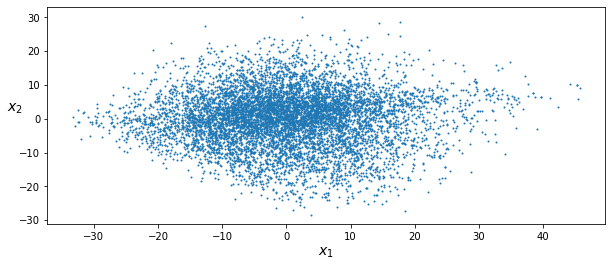

In [89]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(10, 4))
plot_clusters(trainX2D)
plt.show()

### Optimal Number of Clusters

To find the number of clusters, the elbow method was used. In the code below, the data was fitted into several models and the inertia for each clusterer plotted against the number of clusters. 

In [53]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(trainX2D)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [21]:
inertias

[1528962.915200128,
 920460.9942853844,
 680789.330637981,
 507617.85945282987,
 428425.4442485668,
 362124.3581138189,
 310842.654955374,
 276500.6268877866,
 246572.8653760112,
 224941.73927229625,
 205388.29610690844,
 188802.50821245025,
 176049.27460663303,
 161901.3741906133,
 151298.432248019,
 143331.2812653276,
 135329.18383385972,
 127505.4059994835,
 121470.35240008934]

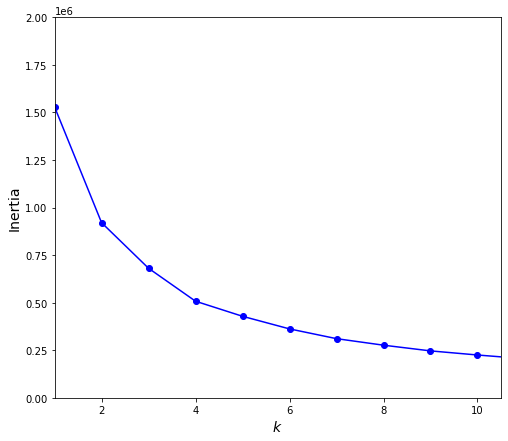

In [23]:
plt.figure(figsize=(8, 7))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10.5, 0, 2000000])
plt.show()

For the sake of comparison, the same procedure as above was applied to the original data(with 9216 dimensions)

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(train_images)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[4651481.972466642,
 4042598.6062777704,
 3802037.84734913,
 3627464.994273644,
 3489077.219853462,
 3404724.019524816,
 3335596.296156053,
 3283843.191101059,
 3238531.5400846335,
 3201206.2145019025,
 3167456.1303968024,
 3138904.2122509982,
 3111860.544288165,
 3092811.9361409345,
 3066229.113450911,
 3047446.9901415636,
 3032964.756769674,
 3016854.4180584024,
 3002985.634006284]

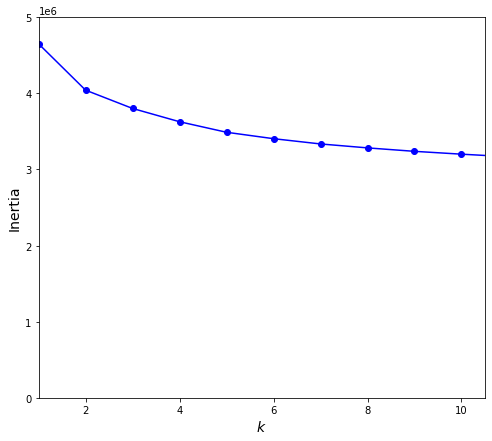

In [34]:
plt.figure(figsize=(8, 7))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10.5, 0, 5000000])
plt.show()

The k-means algorithm was then applied to the data using k = 10

In [84]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans10 = kmeans.fit_predict(train_images)

Convert labels in train_y to 0-9

In [82]:
y_train = train_y-1

Compare labels with that of actual dataset

In [85]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_kmeans10))

Accuracy: 0.123125


In [72]:
confusion_matrix(train_y, y_pred_kmeans10)

array([[108,  38,  45,  16, 219, 123,  43, 120,  53,  35],
       [172,   0,  53,  58,  82, 155, 180,  36,  25,  39],
       [ 22,  61,  62, 151,   7,  44,  51,  21, 138, 243],
       [ 88,   1, 129, 113,  19, 172, 183,  24,  32,  39],
       [117,   0, 164,  67,  44, 138, 169,  37,  42,  22],
       [142,   1, 104,  78,  51, 150, 177,  23,  26,  48],
       [129,   3, 137,  93,  22,  85, 238,  21,  47,  25],
       [136,   0,  80,  98,  14, 135, 240,  22,  47,  28],
       [ 17, 213,  24,  23,  26,  71,  25, 207, 103,  91],
       [ 31, 154,  34,  79,  16,  33,  68,  77, 163, 145]], dtype=int64)

Use k means on test set

In [106]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans_test = kmeans.fit_predict(test_images)

Compare test set with predicted clusters

In [88]:
y_test = test_y-1
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_kmeans_test))

Accuracy: 0.066


Principal Component Analysis was applied to the test images in order to visualize it in 2D

In [32]:
pca2 = PCA(n_components=2)
testX2D = pca2.fit_transform(test_images)
print(testX2D, testX2D.shape)

[[ 1.69106706  1.79605285]
 [ 2.43145634  8.5953305 ]
 [-0.51624801  4.84360537]
 ...
 [ 2.63185828  2.97734581]
 [ 3.06007258 -1.72946077]
 [ 9.25338122 15.98897799]] (5000, 2)


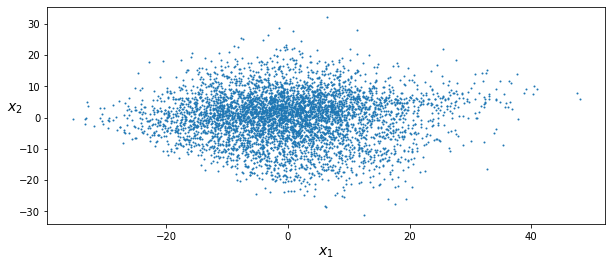

In [90]:
plt.figure(figsize=(10, 4))
plot_clusters(testX2D)
plt.show()

In [96]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans = kmeans.fit_predict(trainX2D)

In [97]:
X = trainX2D
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False) 

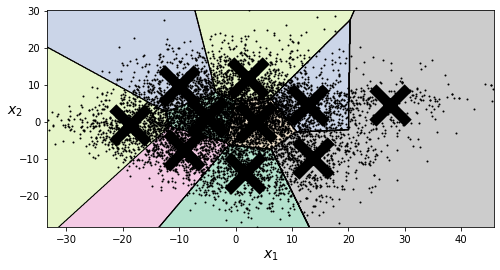

In [98]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Performance Evaluation

Precision

In [111]:
precision_score(y_test, y_pred_kmeans_test, average='micro')

0.066

Recall

In [112]:
recall_score(y_test, y_pred_kmeans_test, average='micro')

0.066

F1 Score

In [113]:
f1_score(y_test, y_pred_kmeans_test, average='micro')

0.066

### Making conclusions

The optimal number of clusters using the elbow method was the same for both 2 dimensional data and the original data. the elbow appeared to be at k=2. After reducing the dimensionality of the images and applying k-means of k=10 with 1, 2 and 3 iterations, the images appear to be normally distributed. There aren't clear distinctions between clusters.
From using inertia, the best model seem to be the one with k = 2. However, our data has 10 classes. The model with k=10 was now used to predict and compare performances with the actual data
In conclusion, because the data normally distributed and seems to have a single center for the entire data, k-means is not a good classifier.

## Beyond K-means: Applying GMM

Gaussian Mixture Model was applied to the data 

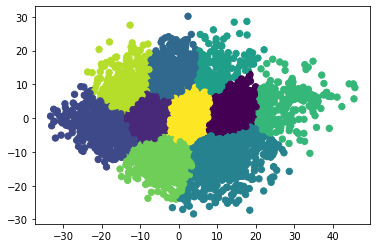

In [103]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components = 10).fit(trainX2D)
y_predict_gmm=gmm.predict(trainX2D)
plt.scatter(trainX2D[:, 0], trainX2D[:, 1], c=y_predict_gmm, s=40)

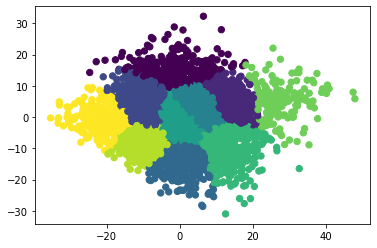

In [104]:
gmm2 = GMM(n_components = 10).fit(testX2D)
y_predict_gmm=gmm2.predict(testX2D)
plt.scatter(testX2D[:, 0], testX2D[:, 1], c=y_predict_gmm, s=40)

### Performance Evaluation

In [118]:
confusion_matrix(y_test, y_predict_gmm)

array([[ 28,  94,  30,  22,  85,  47,  92,  83,  13,   6],
       [ 18,  67,  96,   5, 111,  94,  27,  30,  15,  37],
       [ 17,   8,  79,  70,  15,  62,  20,   2, 138,  89],
       [ 42,  35, 116,  12,  97, 114,  19,   9,  20,  36],
       [ 59,  39,  92,   7, 125, 106,  13,  12,  17,  30],
       [ 57,  49, 107,  11,  98, 100,  18,  15,  20,  25],
       [ 63,  38, 114,   7,  90, 111,  15,   7,  26,  29],
       [ 25,  25, 102,   7, 114, 140,  20,   4,  37,  26],
       [  3,  22,  33, 109,  40,  84, 132,   6,  63,   8],
       [ 14,   5,  42, 119,  25,  91,  48,   6, 107,  43]], dtype=int64)

Precision

In [115]:
precision_score(y_test, y_predict_gmm, average='micro')

0.1072

Recall

In [116]:
recall_score(y_test, y_predict_gmm, average='micro')

0.1072

F1 Score

In [ ]:
f1_score(y_test, y_predict_gmm, average='micro')

### Making Conclusions

The GMM also performed worse than the Naive Bayes Classifiers. It is obvious that K-means and GMM are more suited to data with different center points but as observed above, this data is centered mainly around a single point.

# Supervised Learning: Generalisation and Overfitting; Decision Trees

## Decision Classifier on Training Set

In [11]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(train_images, train_y)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Measure Accuracy

In [12]:
predictions =tree_clf.predict(test_images)
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(test_y, predictions) )

Accuracy:  0.1936


### Measure Accuracy Using 10-fold Validation

In [13]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(tree_clf, train_images, train_y, scoring='accuracy', cv = 10)
print(accuracy)

[0.19375 0.2     0.20875 0.195   0.20375 0.19625 0.20375 0.19375 0.2025
 0.20375]


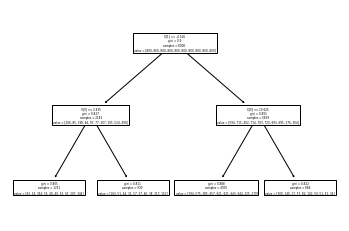

In [28]:
plot_tree(tree_clf);

### Decision Tree Classifier on Training and Test Sets

>1, train: 0.164, test: 0.163
>2, train: 0.204, test: 0.194
>3, train: 0.236, test: 0.226
>4, train: 0.286, test: 0.260
>5, train: 0.320, test: 0.270
>6, train: 0.358, test: 0.276
>7, train: 0.403, test: 0.278
>8, train: 0.448, test: 0.281
>9, train: 0.501, test: 0.273
>10, train: 0.551, test: 0.268
>11, train: 0.608, test: 0.259
>12, train: 0.661, test: 0.258
>13, train: 0.714, test: 0.256
>14, train: 0.757, test: 0.258
>15, train: 0.795, test: 0.257
>16, train: 0.828, test: 0.265
>17, train: 0.858, test: 0.260
>18, train: 0.886, test: 0.263
>19, train: 0.905, test: 0.260
>20, train: 0.925, test: 0.253


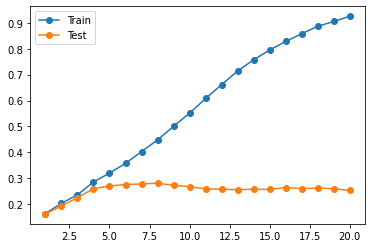

In [10]:

# evaluate decision tree performance on train and test sets with different tree depths


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

X_train, y_train, X_test, y_test = train_images, train_y, test_images, test_y


# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

### Measure Accuracy Using Precision, Recall and F1-score

Precision

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(test_y, predictions, average='micro')

0.1936

Recall

In [16]:
recall_score(y_test, predictions, average='micro')

0.1936

F1_Score

In [17]:
f1_score(test_y, predictions, average='micro')

0.19360000000000002

Change decision tree parameters such as depth of tree, confidence threshold for pruning, splitting criteria and the minimal number of instances permissible per leaf. State how these influence the classifier's performance.

>20, train: 0.308, test: 0.264
>20, train: 0.269, test: 0.240
>20, train: 0.239, test: 0.223
>20, train: 0.229, test: 0.220
>20, train: 0.211, test: 0.207
>20, train: 0.211, test: 0.207
>20, train: 0.211, test: 0.207
>20, train: 0.190, test: 0.186
>20, train: 0.164, test: 0.163
>20, train: 0.164, test: 0.163


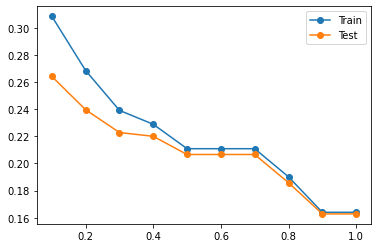

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

X_train, y_train, X_test, y_test = train_images, train_y, test_images, test_y


# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
# evaluate a decision tree for each depth
for min_samples_split in min_samples_splits:
	# configure the model
	model = DecisionTreeClassifier(min_samples_split=min_samples_split)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(min_samples_splits, train_scores, '-o', label='Train')
pyplot.plot(min_samples_splits, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

### New Training Set with 30% from Test Set

In [84]:
pca = PCA(n_components=8)
trainX2D = pca.fit_transform(train_images)
testX2D = pca.fit_transform(test_images)
print(trainX2D, trainX2D.shape)

[[  8.38572345  10.29539077  -9.13851877 ...   2.45291947   1.3151199
   -2.89563526]
 [  0.0272276    3.88350758   0.3841987  ...   0.38274099  -0.85095259
   -1.90772885]
 [ 20.89144086   5.21105562   0.21333881 ...   0.23006009  -0.39251299
    1.51827074]
 ...
 [ 11.77359166  -8.6510666   -1.72047084 ...   1.54912698  -1.92407411
    1.76194258]
 [ -0.12795331 -13.9442271    0.55960004 ...   3.77820475   5.65484541
    2.43157091]
 [ 22.77521235  -3.02051322   3.15371528 ...  -1.38177964  -0.61080547
   -0.93110102]] (8000, 8)


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(trainX2D, train_y, train_size = 0.3, random_state = 42)

In [86]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2400, 8) (5600, 8) (2400,) (5600,)


In [87]:
from sklearn.model_selection import GridSearchCV
params = {
'max_depth': np.arange(5,16),
'max_leaf_nodes': [5, 10, 20, 100],
'min_samples_split': [2, 5, 7, 10, 20, 50, 100],
'criterion': ["gini", "entropy"]
}



grid_search = GridSearchCV(estimator= DecisionTreeClassifier(random_state=7),
param_grid=params,
cv=10, scoring = "accuracy")
grid_search.fit(x_train, y_train)



score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=100,
                       random_state=7)

In [98]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=100,
                       random_state=7)


In [100]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=100,
                       random_state=7)

In [102]:
pred = tree_clf.predict(x_train)
print("Accuracy: ", metrics.accuracy_score(y_train, pred))

Accuracy:  0.40375


In [104]:
pred = tree_clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, pred))

Accuracy:  0.24625


### New Training Set with 60% from Test Set

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(trainX2D, train_y, train_size = 0.6, random_state = 42)

In [108]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4800, 8) (3200, 8) (4800,) (3200,)


In [109]:
from sklearn.model_selection import GridSearchCV
params = {
'max_depth': np.arange(5,16),
'max_leaf_nodes': [5, 10, 20, 100],
'min_samples_split': [2, 5, 7, 10, 20, 50, 100],
'criterion': ["gini", "entropy"]
}



grid_search = GridSearchCV(estimator= DecisionTreeClassifier(random_state=7),
param_grid=params,
cv=10, scoring = "accuracy")
grid_search.fit(x_train, y_train)



score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=100, random_state=7)

In [117]:
tree_class = DecisionTreeClassifier(max_depth = 14, max_leaf_nodes = 100, random_state = 7)
tree_class.fit(x_train, y_train)
pred = tree_class.predict(x_test)

In [118]:
print("Accuracy: ", metrics.accuracy_score(y_test, pred))

Accuracy:  0.288125


### Making Conclusions By Analyzing the Effects of Overfitting

As the number of max depth increases, the accuracy of the model on the train set increases as well. However, the accuracy on the test set tends to decrease after a while.

## Random Forest Classifier on Training Set

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
trainX2D = pca.fit_transform(train_images)
testX2D = pca.fit_transform(test_images)
print(trainX2D, trainX2D.shape)

[[  8.38572345  10.29539077  -9.13851877 ...   0.41826216  -0.22262303
   -0.81284144]
 [  0.0272276    3.88350758   0.3841987  ...   0.04996305   0.44088672
   -0.63065563]
 [ 20.89144086   5.21105562   0.2133388  ...  -0.3263195    0.44915997
    0.52233447]
 ...
 [ 11.77359166  -8.6510666   -1.72047084 ...  -0.44516236   0.07018276
    0.1026926 ]
 [ -0.12795331 -13.9442271    0.55960005 ...   0.48865047  -0.26680188
   -0.52332333]
 [ 22.77521235  -3.02051322   3.15371528 ...  -0.21008337   0.03457727
   -0.09873769]] (8000, 128)


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(trainX2D, train_y);


In [37]:
pred = rf.predict(trainX2D)

In [38]:
print("Accuracy: ", metrics.accuracy_score(train_y, pred) )

Accuracy:  1.0


In [39]:
pred_test = rf.predict(testX2D)

In [40]:
print("Accuracy: ", metrics.accuracy_score(test_y, pred_test) )

Accuracy:  0.2992


### Measure Accuracy Using 10-fold Validation

In [43]:
rfc_cv_score = cross_val_score(rf, trainX2D, train_y, cv=10, scoring='accuracy')

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(test_y, pred_test))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, pred_test))
print('\n')
print("=== All Accuracy Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Accuracy Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[198  18  32  11  60  11  30   8 106  26]
 [ 65  75  41  68  91  28  49  40  27  16]
 [ 12   3 218  24   6   9  41   8  34 145]
 [ 41  25  51  81  98  36  55  55  24  34]
 [ 50  35  23  65 193  23  39  30  27  15]
 [ 51  51  49  60  62  51  70  57  25  24]
 [ 35  25  66  40  38  46 144  54  18  34]
 [ 24  42  41  50  86  27  78 101  22  29]
 [ 36   8  46  16  19   3  11   6 280  75]
 [ 22   5 152  12   8   5  35  18  88 155]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.37      0.40      0.38       500
           2       0.26      0.15      0.19       500
           3       0.30      0.44      0.36       500
           4       0.19      0.16      0.17       500
           5       0.29      0.39      0.33       500
           6       0.21      0.10      0.14       500
           7       0.26      0.29      0.27       500
           8       0.27      0.20      0.23       500
           9       0.43  

>1, train: 0.289, test: 0.227
>2, train: 0.328, test: 0.247
>3, train: 0.368, test: 0.258
>4, train: 0.406, test: 0.269
>5, train: 0.464, test: 0.279
>6, train: 0.536, test: 0.283
>7, train: 0.626, test: 0.289
>8, train: 0.719, test: 0.296
>9, train: 0.794, test: 0.295
>10, train: 0.845, test: 0.301
>11, train: 0.889, test: 0.305
>12, train: 0.922, test: 0.301
>13, train: 0.940, test: 0.303
>14, train: 0.954, test: 0.303
>15, train: 0.964, test: 0.307
>16, train: 0.971, test: 0.301
>17, train: 0.978, test: 0.304
>18, train: 0.984, test: 0.299
>19, train: 0.989, test: 0.303
>20, train: 0.992, test: 0.309


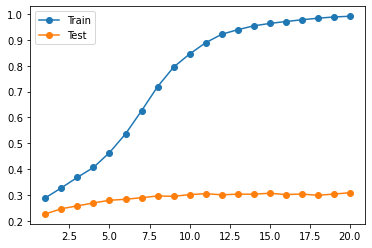

In [48]:

# evaluate decision tree performance on train and test sets with different tree depths


X_train, y_train, X_test, y_test = trainX2D, train_y, testX2D, test_y


# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth= i, n_estimators = 1000, random_state = 42)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

# Neural Networks and Convolutional Neural Networks

Linear classifier With 10-fold Validation

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
lin_clf = SGDClassifier()
accuracy = cross_val_score(lin_clf, train_images, train_y, scoring='accuracy', cv = 10)

In [16]:
lin_clf = lin_clf.fit(train_images, train_y)

Linear classifier Without 10-fold Validation

In [11]:
from sklearn.linear_model import SGDClassifier

lin_reg = SGDClassifier()
lin_reg.fit(train_images, train_y)
lin_reg.intercept_, lin_reg.coef_

(array([-4.57836131e+02, -3.52422413e+01,  1.33183948e+01,  1.63710827e-01,
        -1.27836439e+01, -1.46773183e+01,  2.79870343e+00, -1.48871470e+00,
        -1.99510817e+02, -2.73982373e+00]),
 array([[ 3.90343457,  0.75318952,  0.29105189, ..., -1.05521769,
         -0.40272141, -0.22777078],
        [ 1.39367594,  0.80050266,  2.04290059, ...,  0.54910112,
          0.74117319,  1.54657275],
        [ 0.28278658,  0.47565863,  0.46261561, ..., -0.3040194 ,
         -1.20979443, -1.28289601],
        ...,
        [-0.03300784,  2.37812909,  0.87521247, ...,  0.33467124,
         -0.29439561,  1.08784555],
        [-2.22228417, -2.40050442, -0.9246925 , ..., -0.45630708,
         -1.51357616, -1.29391115],
        [-0.06232413, -1.01197159, -1.83604058, ..., -1.68250681,
         -0.95547352, -0.04127199]]))

Perform on Test Set

In [17]:
y_pred = lin_clf.predict(test_images)

In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(test_y, y_pred) )

Accuracy:  0.2282


In [22]:
y_predict = lin_reg.predict(test_images)

In [24]:
print("Accuracy: ", accuracy_score(test_y, y_predict) )

Accuracy:  0.2198


Making Conclusions
Is the data set linearly saparable or not

The data set is not linearly separable

Run the Multilayer Perceptron, experiment with various Neural Network parameters: modify
the activation functions, experiment with the number and size of its layers, vary the learning rate, epochs
and momentum, and validation threshold. Analyse relative performance of the resulting Neural
Networks and changing parameters, using the training and the test data.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Conv2D, MaxPool2D, Flatten

In [50]:
input_shape = (9216,)
num_classes = 10

In [51]:
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [22]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit([0,1,2,3,4,5,6,7,8,9])

y_train = train_y-1
y_train = to_categorical(y_train)
y_test = test_y-1
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(8000, 10) (5000, 10)


In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_images,y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - ETA: 0s - loss: 3.4239 - acc: 0.1227WARNING:tensorflow:From C:\Users\Felix Modebe\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
6400/6400 [==============================] - 119s 19ms/sample - loss: 3.4239 - acc: 0.1227 - val_loss: 2.2848 - val_acc: 0.1437
Epoch 2/10
6400/6400 [==============================] - 14s 2ms/sample - loss: 2.2756 - acc: 0.1445 - val_loss: 2.2835 - val_acc: 0.1350
Epoch 3/10
6400/6400 [==============================] - 12s 2ms/sample - loss: 2.2587 - acc: 0.1780 - val_loss: 2.2547 - val_acc: 0.1719
Epoch 4/10
6400/6400 [==============================] - 13s 2ms/sample - loss: 2.2441 - acc: 

Convolutional Neural Network

In [76]:
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(96, 96, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
X_train = train_x/255
X_test = test_x/255

# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_test, y_test))

Train on 8000 samples, validate on 5000 samples
Epoch 1/10
8000/8000 [==============================] - 2621s 328ms/sample - loss: 1.8324 - acc: 0.2871 - val_loss: 1.5429 - val_acc: 0.3792
Epoch 2/10
8000/8000 [==============================] - 5138s 642ms/sample - loss: 1.4760 - acc: 0.4429 - val_loss: 1.3892 - val_acc: 0.4754
Epoch 3/10
8000/8000 [==============================] - 3958s 495ms/sample - loss: 1.2449 - acc: 0.5441 - val_loss: 1.2126 - val_acc: 0.5586
Epoch 4/10
8000/8000 [==============================] - 1928s 241ms/sample - loss: 1.0406 - acc: 0.6226 - val_loss: 1.2348 - val_acc: 0.5540
Epoch 5/10
8000/8000 [==============================] - 2065s 258ms/sample - loss: 0.8407 - acc: 0.7021 - val_loss: 1.1943 - val_acc: 0.5842
Epoch 6/10
8000/8000 [==============================] - 2194s 274ms/sample - loss: 0.6636 - acc: 0.7639 - val_loss: 1.2433 - val_acc: 0.5748
Epoch 7/10
8000/8000 [==============================] - 2115s 264ms/sample - loss: 0.5082 - acc: 0.8209 - 

In [ ]:
Based on all of these experiments, what conclusions can you make about the data set complexity
(linear separability), and the capacity of deep neural networks to generalize to new data? Can you make
any conclusions about the effect of activation functions?

# MSc Research Question

## Defining The Question

In trying to solve this problem, PCA had poor performance in dimensionality reduction. And without PCA the dimension of the data would be too large to run certain algorithms. The question is how can the dimensions of the data be reduced and still maintain the integrity of the data?

In [ ]:
First binarize the images using a threshold

In [10]:
import cv2

def threshold(threshold, maxval, image):
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            if (image[y,x] >= threshold):
            	image[y, x] = maxval
            else:
             	image[y, x] = 0

            
    # return the thresholded image
    return image

Training Images


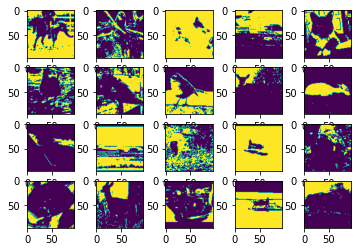

Testing Images


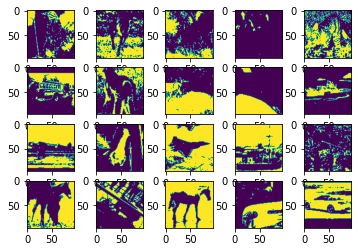

In [17]:
row = 4
column =5
for i in range(x_train.shape[0]):
    X_train = threshold(128, 200, x_train[i])
    
print("Training Images")
for i in range(20):
    plt.subplot(row,column,i+1)
    plt.imshow(x_train[i])
plt.show()

for i in range(x_test.shape[0]):
    X_test = threshold(128, 200, x_test[i])
    
print("Testing Images")
for i in range(20):
    plt.subplot(row,column,i+1)
    plt.imshow(x_test[i])
plt.show()
    

In [18]:
from skimage.transform import rescale, resize
x_train = resize(x_train, (8000, 32, 32))
x_test = resize(x_test, (5000, 32, 32))
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train)


[[[[2.00000000e+02]
   [2.00000000e+02]
   [2.00000000e+02]
   ...
   [2.00000000e+02]
   [2.00000000e+02]
   [2.00000000e+02]]

  [[2.00000000e+02]
   [2.00000000e+02]
   [2.00000000e+02]
   ...
   [1.99981400e+02]
   [1.99990514e+02]
   [1.99993401e+02]]

  [[1.99993523e+02]
   [1.99999996e+02]
   [2.00000000e+02]
   ...
   [1.58178626e+02]
   [1.71141411e+02]
   [1.78970509e+02]]

  ...

  [[2.00000000e+02]
   [2.00000000e+02]
   [2.00000000e+02]
   ...
   [1.99996072e+02]
   [1.99646388e+02]
   [1.99996072e+02]]

  [[2.00000000e+02]
   [2.00000000e+02]
   [2.00000000e+02]
   ...
   [1.99646388e+02]
   [1.68168822e+02]
   [1.99646388e+02]]

  [[2.00000000e+02]
   [2.00000000e+02]
   [2.00000000e+02]
   ...
   [1.99996072e+02]
   [1.99646388e+02]
   [1.99996072e+02]]]


 [[[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
 

The answer to this question would be advanced feature selection techniques. This would reduce the overall dimensions of the data, clearly define the edges and seperate the images from the background. The technique of binarizing and resizing the images worked fine. It took less computation time. While using the normal data took about 6 hours, this technique took only 

In [23]:
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 1)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=8, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1000/1000 [==============================] - 198s 198ms/step - loss: 2.5479 - accuracy: 0.1988 - val_loss: 1.9518 - val_accuracy: 0.2618
Epoch 2/10
1000/1000 [==============================] - 233s 233ms/step - loss: 1.9075 - accuracy: 0.2854 - val_loss: 1.8157 - val_accuracy: 0.3138
Epoch 3/10
1000/1000 [==============================] - 244s 244ms/step - loss: 1.8119 - accuracy: 0.3277 - val_loss: 1.7543 - val_accuracy: 0.3358
Epoch 4/10
1000/1000 [==============================] - 257s 257ms/step - loss: 1.7129 - accuracy: 0.3731 - val_loss: 1.6611 - val_accuracy: 0.3660
Epoch 5/10
1000/1000 [==============================] - 266s 266ms/step - loss: 1.6404 - accuracy: 0.3919 - val_loss: 1.6324 - val_accuracy: 0.3874
Epoch 6/10
1000/1000 [==============================] - 258s 258ms/step - loss: 1.5886 - accuracy: 0.4162 - val_loss: 1.6576 - val_accuracy: 0.3838
Epoch 7/10
1000/1000 [==============================] - 265s 265ms/step - loss: 1.5112 - accuracy: 0.4409 - val_